# Measures of Risk and Reward

## Volatility - Standard Deviation and Variance

* We compute the average of the square of the *deviations from the mean*
* This measure is called *variance* and is computed as follows:

$$\sigma^2_R = \frac{1}{N} \sum_{i=1}^N(R_i - \bar{R})^2, $$

wehere $\bar{R}$ is the *arithmetic mean of the return*

* The variance of a set of returns is nothing more than the average of the square of the deviations from its mean.
* Since the variance is squared, it makes it hard to compare iwht the returns themselves. So we take the square root of the variance:

$$\sigma_R =\sqrt{ \frac{1}{N} \sum_{i=1}^N(R_i - \bar{R})^2 }$$

## Annualizing Volatility

* We can't compare the volatility from *daily data* with the volatility from *monthly data*

$$\sigma_{ann} = \sigma_p\sqrt{p} $$

* For instance: the standard deviation of a stock's daily return series is $.1\%$: $ .001 \times \sqrt{252} = 1.58\% $

## Risk Adjusted Measures

How to compare returns with different risks?

* One method is to look at the return in relation with the risk or  the return-to-risk-ratio (RTRR)
$$ \text{RTRR} = \frac{\text{Return}}{\text{Volatility}} $$
* The higher the return-to-risk ratio, the larger the gain for a decision in rlation to its risk - therefore the better the decision
* Another method is to look at its excess return *over the risk free rate*
$$Sharpe Ratio = \frac{\text{Return - Risk Free Rate}}{\text{Volatility}}$$
* Excess return = Return over the risk free rate = Return - risk free rate
$$Sharpe Ratio(P) = \frac{R_p - R_f}{\sigma_p}$$

In our example small cap stocks did in fact provide better risk adjusted return than large cap stocks over this period ($R_f = 3\%$)

## Lab Session

In [1]:
import pandas as pd

In [2]:
prices = pd.read_csv("../data/sample_prices.csv")
# compute the returns
returns = prices.pct_change()

In [3]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [5]:
# drop the first line
returns.dropna(inplace=True)
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [6]:
# The volatilty is the standard deviation of returns and not prices!:
# std: How far do these deviate from the mean?
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [8]:
deviations = returns -  returns.mean()
# we want a kind of distance to measure how far they deviate:
squared_deviations = deviations**2
# Variance = average squared deviation from the mean
variance = squared_deviations.mean()

In [11]:
import numpy as np
# volatility is the standard deviation 
volatility = np.sqrt(variance)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

Oops the results don't match. Why that?  

the standard deviation uses a numerator which is $(n - 1)$, whereas the built in `mean()` function uses a numerator which is n!

We use $(n - 1)$ when we have a sample data and $n$ is for the population std

In [13]:
# So let's correct that:
# We need to change How to calculate the variance:
number_of_obs = returns.shape[0]
variance = squared_deviations.sum()/(number_of_obs - 1)
volatility = variance**.5

In [14]:
# now is it the same
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [16]:
# Remember that was the monthly volatility and we wnat the annualized volatility
# multiply the volatility by the square root of the number of periods in a year
returns.std() * np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [17]:
returns = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv", 
                     header=0, index_col=0, parse_dates=True,
                     na_values=-99.99)

In [19]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [20]:
# Let's keep only the columns we are interested in
# Those are:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]

In [21]:
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [22]:
# The returns are already in percent
# It is better to work with raw data:
returns = returns/100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


In [23]:
# Let's change the name of the columns to a more descriptive ones:
returns.columns = ['SmallCap', 'LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


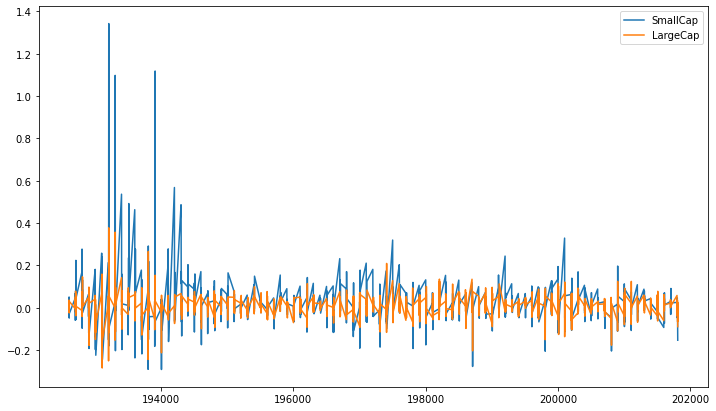

In [26]:
returns.plot.line(figsize=(12,7));

In [27]:
# We can see from above that the small cap rate of returns is much more volatile.
# Let's see if we get the same results:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [28]:
# annualize volatility
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [32]:
# annualized returns are a bit trickier than the volatility
# (returns + 1).prod(): is the total returns over all months
# so we need first the total number of months:
n_months = returns.shape[0]

# the return per one month:
return_per_month = (returns + 1).prod()**(1/n_months) -1 
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [34]:
# annualized return:
annualized_return = (return_per_month + 1)**12 - 1 
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [36]:
# Annulaized returns in one step
annualized_return = (returns + 1).prod()**(12/n_months) - 1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [38]:
# Now let's compute the RTRR:
annualized_return / annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [40]:
# Sharpe Ratio:
riskfree_rate = 0.03
# We should actually take the times series of the risk pre-rate
# Just to illustrate the point, let's assume it was flat 3%
excess_return = annualized_return - riskfree_rate

sharpe_ratio = excess_return / annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64